1. X: (22750, 33, 33, 1)  y: (22750, 1089)
1. X_train: (18200, 33, 33, 1)  y_train: (18200, 1089)
1. X_test: (4550, 33, 33, 1)  y_test: (4550, 1089)


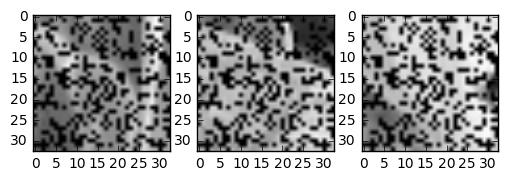

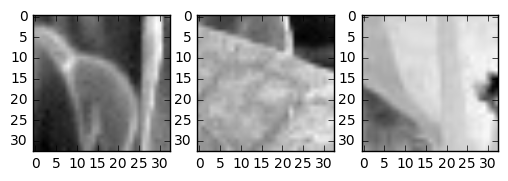

In [1]:
"""
1. Get X and y
2. Split into training and testing data
3. Reshape X -> (samples, channels, x-axis, y-axis)
   Reshape y -> (sampples, x-axis * y-axis)
4. Create ReconNet Units
   Figure out the zero padding post each step to maintain a 33 * 33 filter size 
"""
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

np.random.seed(7)
%matplotlib inline

def get_data_theanoformat(url_data_X, url_data_y):
    with open(url_data_X, 'rb') as handle:
        X = joblib.load(handle)
        
    with open(url_data_y, 'rb') as handle:
        y = joblib.load(handle)
    
    
    idxs = np.random.randint(0, len(X), 3)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(X[idxs[0]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[1].imshow(X[idxs[1]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[2].imshow(X[idxs[2]].reshape((33,33)), cmap = plt.cm.gray)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(y[idxs[0]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[1].imshow(y[idxs[1]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[2].imshow(y[idxs[2]].reshape((33,33)), cmap = plt.cm.gray)
    
    X = X.reshape((X.shape[0], 1, 33, 33))
    print ('1. X:', X.shape, ' y:', y.shape)
    return X , y

def get_data_tfformat(url_data_X, url_data_y):
    with open(url_data_X, 'rb') as handle:
        X = joblib.load(handle)
        X = X.reshape((X.shape[0], 33, 33, 1))
        
    with open(url_data_y, 'rb') as handle:
        y = joblib.load(handle)
    
    
    idxs = np.random.randint(0, len(X), 3)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(X[idxs[0]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[1].imshow(X[idxs[1]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[2].imshow(X[idxs[2]].reshape((33,33)), cmap = plt.cm.gray)
    
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(y[idxs[0]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[1].imshow(y[idxs[1]].reshape((33,33)), cmap = plt.cm.gray)
    axarr[2].imshow(y[idxs[2]].reshape((33,33)), cmap = plt.cm.gray)
    
    print ('1. X:', X.shape, ' y:', y.shape)
    return X , y

if __name__ == "__main__" :
    url_data_X = 'data/data_patches_X.gz'
    url_data_y = 'data/data_patches_y.gz'
    X, y = get_data_tfformat(url_data_X, url_data_y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    print ('1. X_train:', X_train.shape, ' y_train:', y_train.shape)
    print ('1. X_test:', X_test.shape, ' y_test:', y_test.shape)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import model_from_json

def train_model(X_train, y_train, model, epochs = 1, batch_size = 32):
    if model == '':
        model = Sequential()

        model.add(Convolution2D(32, kernel_size=(11, 11), activation='relu'
                                    #, input_shape=(1,32,32), data_format='channels_first', padding='same')
                                    , input_shape=(33,33,1), data_format='channels_last', padding='same')
                                )
        print ('First layer:', model.output_shape)
        # print ('First layer:', model.layers[0].output_shape)

        model.add(Convolution2D(64, kernel_size=(1, 1), activation='relu', padding='same'))

        model.add(Convolution2D(1, kernel_size=(7, 7), activation='relu', padding='same'))

        model.add(Convolution2D(32, kernel_size=(11, 11), activation='relu', padding='same'))

        model.add(Convolution2D(64, kernel_size=(1, 1), activation='relu', padding='same'))

        model.add(Convolution2D(1, kernel_size=(7, 7), activation='relu', padding='same'))

        model.add(Flatten())

        model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

        model.summary()
        
        X_train_model = X_train.astype('float32')
        X_train_model /= 255  
        y_train_model = y_train.astype('float32')
        y_train_model /= 255
        
        model.fit(X_train_model, y_train_model, batch_size=batch_size, epochs = epochs, verbose=1, shuffle=True)
    else:
        model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
        
        model.summary()
        
        X_train_model = X_train.astype('float32')
        X_train_model /= 255  
        y_train_model = y_train.astype('float32')
        y_train_model /= 255
        
        model.fit(X_train_model, y_train_model, batch_size=batch_size, epochs = epochs, verbose=1, shuffle=True)
    
    return model
        
def model_disk(action, filename_model_arch, filename_model_weights, model=''):
    if action == 'save':
        with open(filename_model_arch, "w") as handle:
            handle.write(model.to_json())
        model.save_weights(filename_model_weights)
        print("Saved model to disk")
        
    elif action == 'load':
        json_file = open(filename_model_arch, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        model.load_weights(filename_model_weights)
        print("Loaded model from disk")
    
    return model
        
if __name__ == "__main__":
    fresh_model = 0
    
    filename_model_arch = 'model/index_network_euclidean_keras.json'
    filename_model_weights = 'model/index_network_euclidean_keras.h5'
        
    if fresh_model == 1:
        print ('2. --------------------------------------> Fresh model')
        model = ''
        model = train_model(X_train, y_train, '', epochs = 100, batch_size = 64)
        model = model_disk('save', filename_model_arch, filename_model_weights, model)
    else:
        print ('2. --------------------------------------> Updating model')
        model = model_disk('load', filename_model_arch, filename_model_weights, '')
        model = train_model(X_train, y_train, model, epochs = 100, batch_size = 64)
        model = model_disk('save', filename_model_arch, filename_model_weights, model)

2. --------------------------------------> Updating model
Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 33, 33, 32)        3904      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)        2112      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 33, 33, 1)         3137      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 33, 33, 32)        3904      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 64)        2112      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 1)         3137      
_____________________________________________________________

KeyboardInterrupt: 